# Name: Mark Valentino

## Due 12/02 11:59


# Exploring Canny Edge Detection

## Introduction

My motivation for the project is to get a deeper understanding of image manipulation algorithms, and to potentially apply it to my capstone computing project. The problem I wish to solve is finding the best way to implement Canny Edge Detection on images. 

## Method
Canny Edge Detection must be performed in a handful steps. First the image must be converted to black and white. Next the image must have Gaussian blur applied. After that a sobel filter is applied. Then threshholding is applied. Finally, edge tracking though hysteresis is done. I will be simplifying the algorthim. In my implementation, I will not use hysteresis or the predifined thresholding methods. Instead I will apply a basic threshold filter to the result of the sobel filtered image.

#### Step 1 - Convert Image to Black and White
An image will be opened and have its data stored in matrix I. I will have 3 dimensions, with two dimensions representing the X and Y postions of pixels and one dimension representing the red, green, and blue color channels of pixels. Here is a representation of the matrix I below:

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>
$I = \begin{bmatrix} 
    〈{\color{red}R_{11}},{\color{green}G_{11}},{\color{blue}B_{11}}〉  & \dots  & 〈{\color{red}R_{1M}},{\color{green}G_{1M}},{\color{blue}B_{1M}}〉 \\
    \vdots & \ddots & \vdots\\
    〈{\color{red}R_{K1}},{\color{green}G_{K1}},{\color{blue}B_{K1}}〉  & \dots  & 〈{\color{red}R_{KM}},{\color{green}G_{KM}},{\color{blue}B_{KM}}〉  
    \end{bmatrix}$<br>
    
M $\leq$ the width of the image.<br>
K $\leq$ the height of the image.<br>
0 $\leq$ R, G, B $\leq$ 255<br>
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
 
    
∀ entries $R_{KM}$ in matrix I:<br>
set $R_{KM}$ = ($R_{KM}$ $\cdot$ 0.299 + $G_{KM}$ $\cdot$ 0.299 + $B_{KM}$ $\cdot$ 0.114) .

∀ entries $G_{KM}$, $B_{KM}$ in matrix I:<br>
set $G_{KM}$, $B_{KM}$ equal to $R_{KM}$'s new value.<br>
This makes $R_{KM}$ = $G_{KM}$ = $B_{KM}$ .


#### Step 2 - Apply Gaussian Blur
Let Y be a matrix with the values shown below:

$Y = \begin{bmatrix} 
    1/16 & 2/16 & 1/16 \\
    2/16 & 4/16 & 2/16 \\
    1/16 & 2/16 & 1/16 \\
    \end{bmatrix}$<br>
This matrix is a kernel that applies an aprroximate Guassian blur.

Below is the process of how matrix I is blurred:

$I ≈ \begin{bmatrix} 
    〈{\color{red}R_{11}},{\color{green}G_{11}},{\color{blue}B_{11}}〉  & \dots  & 〈{\color{red}R_{1M}},{\color{green}G_{1M}},{\color{blue}B_{1M}}〉 \\
    \vdots & \ddots & \vdots\\
    〈{\color{red}R_{K1}},{\color{green}G_{K1}},{\color{blue}B_{K1}}〉  & \dots  & 〈{\color{red}R_{KM}},{\color{green}G_{KM}},{\color{blue}B_{KM}}〉  
    \end{bmatrix}$ ⊗ $ \begin{bmatrix} 
    1/16 & 2/16 & 1/16 \\
    2/16 & 4/16 & 2/16 \\
    1/16 & 2/16 & 1/16 \\
    \end{bmatrix}$
Each pixel except the edges in I, are effected by the guassian kernel.

#### Step 3 - Apply Sobel Filter
Let Gx, Gy, and G be matrixes.

$Gx = I ⊗  \begin{bmatrix} 
    1 & 0 & -1 \\
    2 & 0 & -2 \\
    1 & 0 & -1 \\
    \end{bmatrix}$
    
$Gy = I ⊗  \begin{bmatrix} 
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1 \\
    \end{bmatrix}$
    
$G = \sqrt{Gx^2 +Gy^2}$


#### Step 4 - Apply Basic threshold
∀ entries $R_{00}$, $G_{00}$, $B_{00}$ to $R_{KM}$, $G_{KM}$, $B_{KM}$ in matrix G:<br>
If the entry value is > 127 then the entry value is set to 255.
If the entry value is < 127 then the entry value is set to 0.


<br>Sources:<br>
https://en.wikipedia.org/wiki/Canny_edge_detector<br>
https://en.wikipedia.org/wiki/Kernel_(image_processing)<br>
https://en.wikipedia.org/wiki/Sobel_operator<br>
https://www.cs.utexas.edu/~theshark/courses/cs324e/lectures/cs324e-6.pdf<br>
https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/<br>

## Implementations

Converting the image to black and white was fairly straightforward. However applying the Gaussian blur kernel filter was challenging. I originally had four for loops to apply the kernel where I had a for loop iterate in the x direction of the image, a for loop iterate in the y direction of the image, a for loop to iterate in the x direction of the kernel, and a for loop to iterate in the y direction of the kernel. To better understand what I was doing and to also incrase performance, I removed the for loops that iterated over the kernel.

I tried applying a Sobel filter to the blurred image without the use of a library, but I got bad results and could not find a solution. So I decided used OpenCV to apply the Sobel filter. Implementing the threshold filter was not difficult.

The original unaltered image:

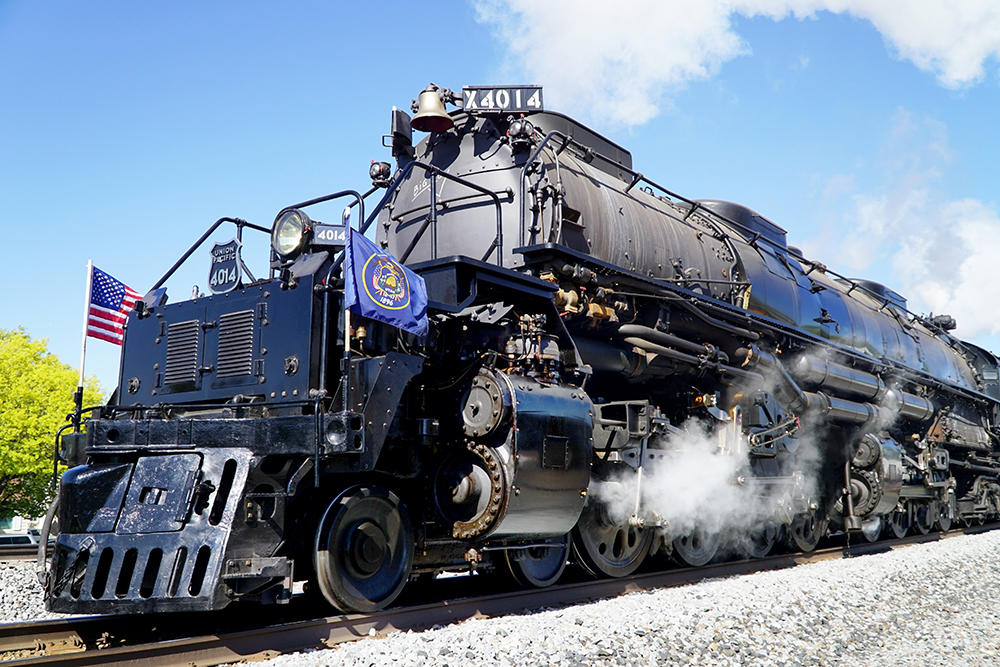

In [1]:
from PIL import Image, ImageFilter
from numpy import asarray
import numpy as np
import copy
import cv2 as cv2

image = Image.open('Big-Boy-4014_utah_ss.jpg')
data = asarray(image)
display(image)

Convert image to black and white:

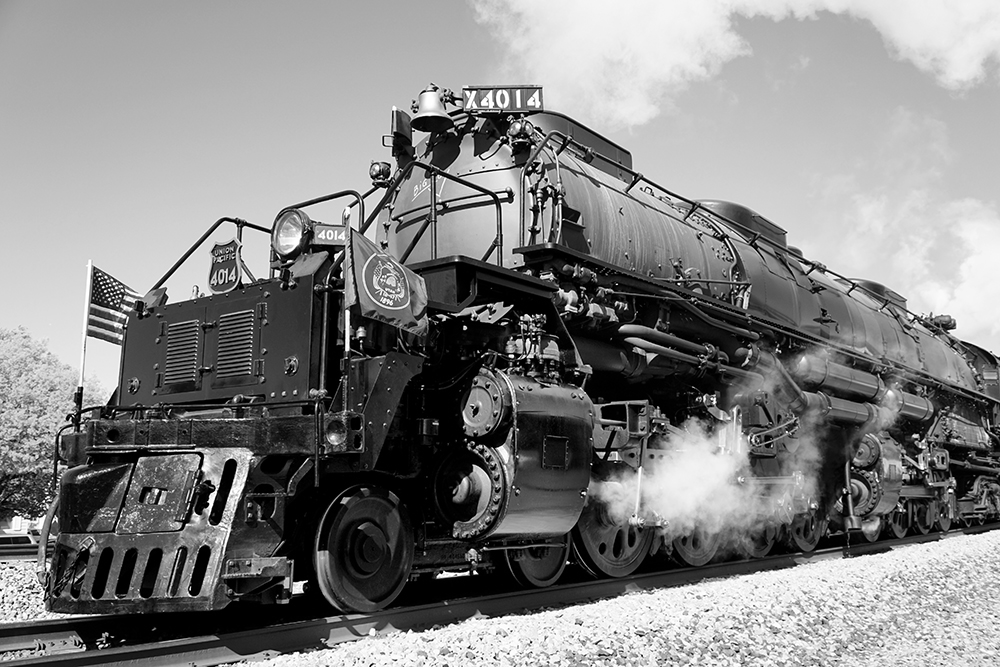

In [2]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        avg = round(0.299 * data[i][j][0] + 0.587 * data[i][j][1] + 0.114 * data[i][j][2])
        data[i][j][0] = avg
        data[i][j][1] = avg
        data[i][j][2] = avg

image2 = Image.fromarray(data)
display(image2)

Apply Gaussian Blur:

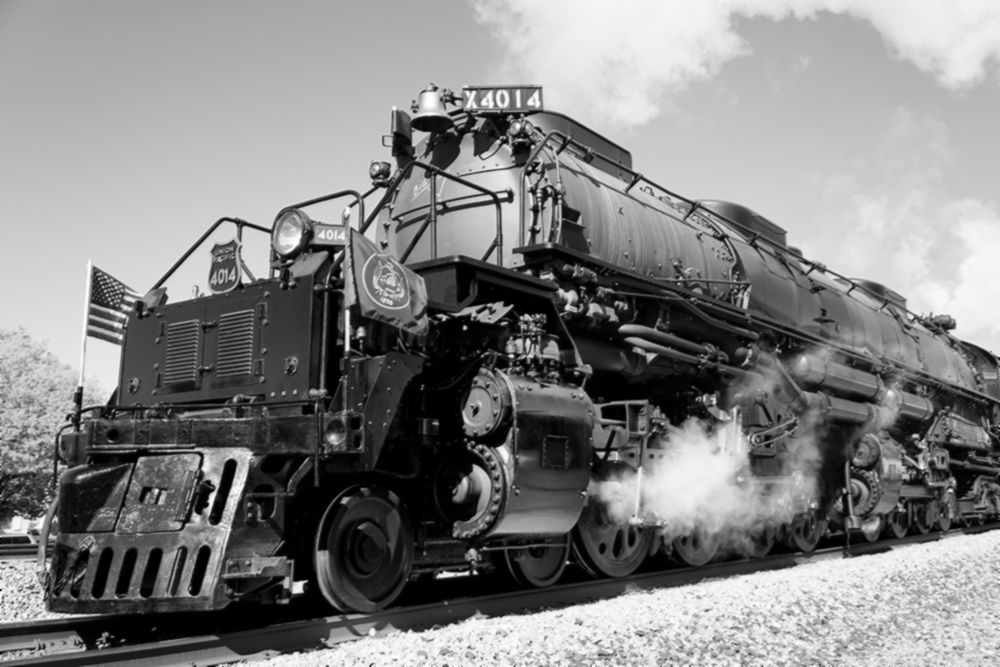

In [3]:
gausKernel = [[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]]
accum = 0
data2 = copy.deepcopy(data)
# For loops avoid iterating over image edges. As a result the images edges aren't blurred.
for i in range(1, data.shape[0] - 1):
    for j in range(1, data.shape[1] - 1):
        accum += gausKernel[0][0] * data2[i - 1][j - 1][0]
        accum += gausKernel[0][1] * data2[i - 1][j][0]
        accum += gausKernel[0][2] * data2[i - 1][j + 1][0]
        accum += gausKernel[1][0] * data2[i][j - 1][0]
        accum += gausKernel[1][1] * data2[i][j][0]
        accum += gausKernel[1][2] * data2[i][j + 1][0]
        accum += gausKernel[2][0] * data2[i + 1][j - 1][0]
        accum += gausKernel[2][1] * data2[i + 1][j][0]
        accum += gausKernel[2][2] * data2[i + 1][j + 1][0]
        accum = round(accum)
        data2[i][j][0] = accum
        data2[i][j][1] = accum
        data2[i][j][2] = accum
        accum = 0
        
        
image3 = Image.fromarray(data2)
display(image3)

Apply Sobel filter:<br>
Source used for code:<br>
https://stackoverflow.com/questions/51167768/sobel-edge-detection-using-opencv

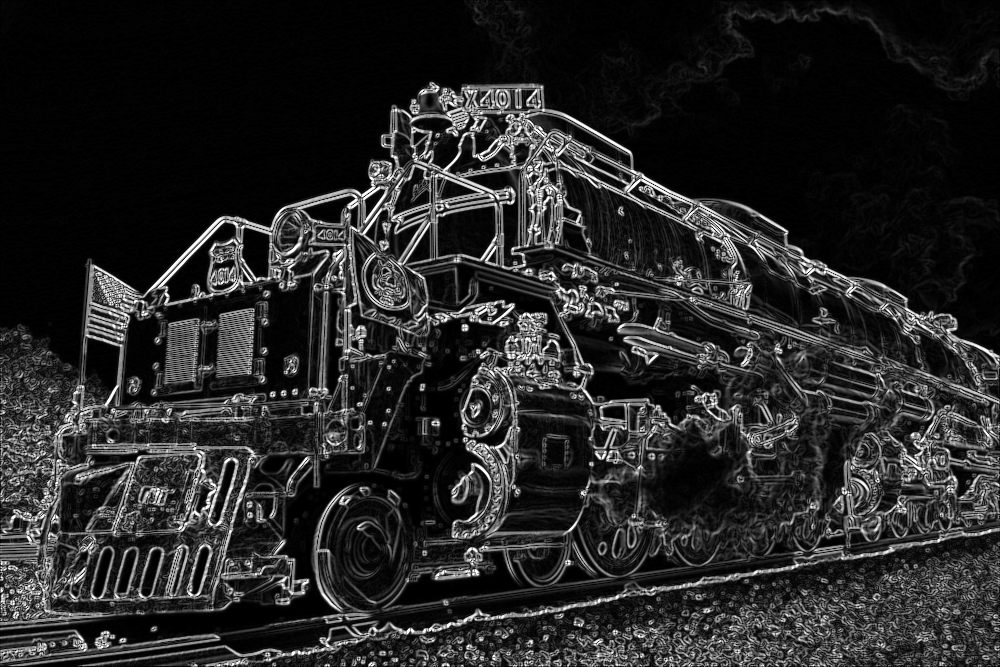

In [4]:
grad_x = cv2.Sobel(data2, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(data2, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

data3 = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

image4 = Image.fromarray(data3)
display(image4)

Apply basic threshold filter:

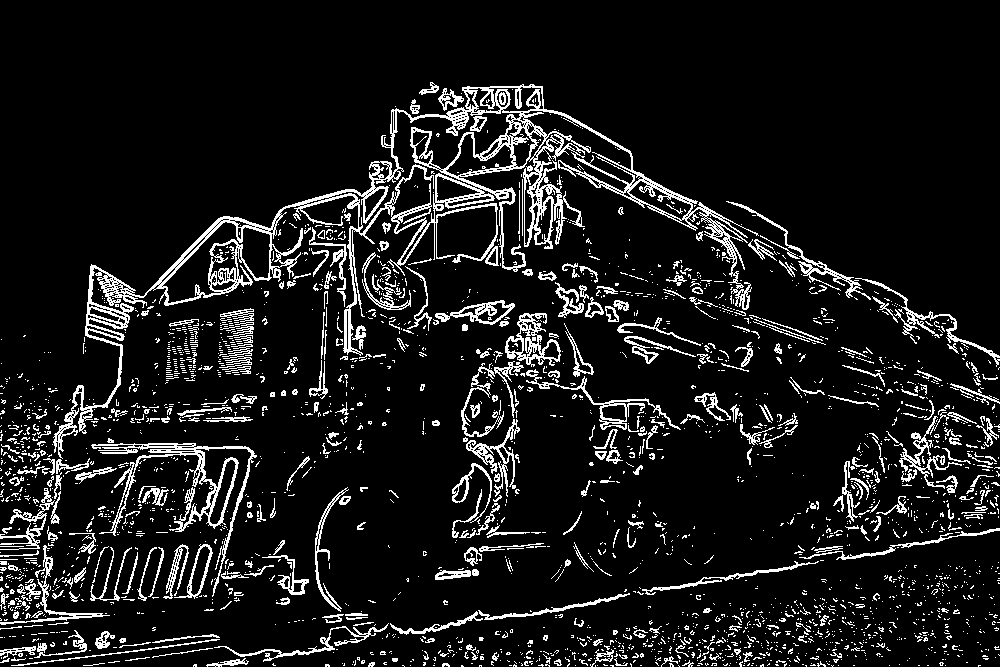

In [5]:
data4 = copy.deepcopy(data3)
for i in range(data4.shape[0]):
    for j in range(data4.shape[1]):
        if (data4[i][j][0] > 127):
            data4[i][j][0] = 255
            data4[i][j][1] = 255
            data4[i][j][2] = 255
        else:
            data4[i][j][0] = 0
            data4[i][j][1] = 0
            data4[i][j][2] = 0
            
image5 = Image.fromarray(data4)
display(image5)

## Results

Here I compare my Gaussian blur implementation to Pillow's filter function with the same kernel I used. I iterated through the pixel values of my image and checked to see if the pixels equalled the pixels in Pillow's implementation. 

Overall, my result is close to Pillow's. The pixels on the edges in both images are equal, so pillow did not blur the edges as how I did. However, my image's pixels inside the edges have slightly different values than Pillow's, and these values seem to be mostly off by just 1 point. My image shares 50% of the same pixel values as Pillow's image.

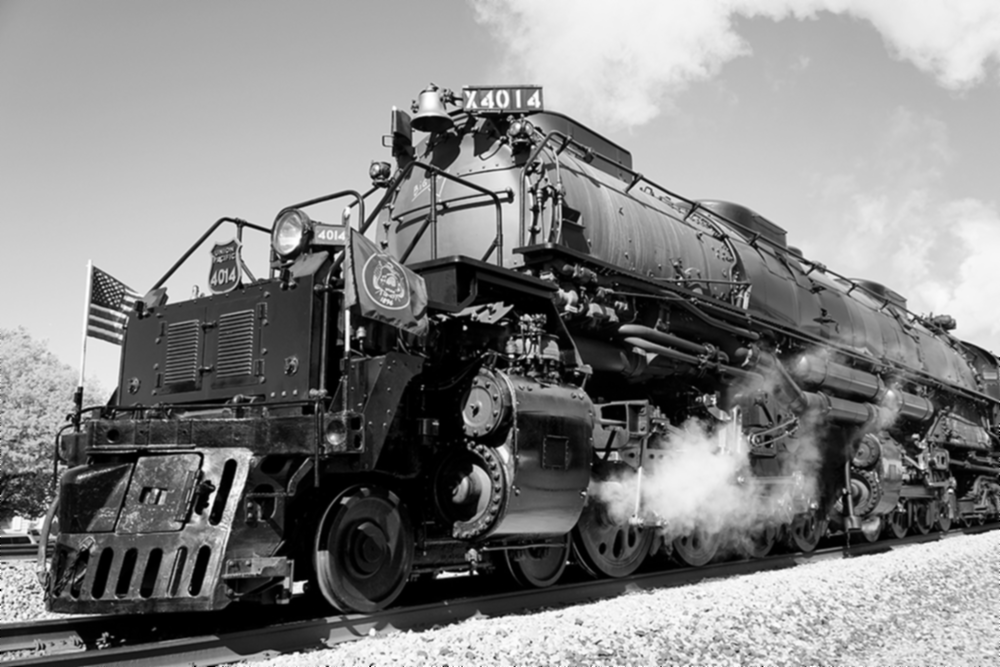

In [6]:
image3Test = image2.filter(ImageFilter.Kernel((3, 3),
      (1/16, 2/16, 1/16, 2/16, 4/16, 2/16, 1/16, 2/16, 1/16), 1, 0))
display(image3Test)
data2Test = asarray(image3Test)

i = 0
j = 0
edgeDifferenceCount = 0
 
while (i < data2.shape[0] - 1):
    j = 0
    while (j < data2.shape[1] - 1):
        j+=1
        if (data2Test[i][j][0] != data2[i][j][0]):
            if (i == 0 or i == data2.shape[0] - 1 or j == 0 or j == data2.shape[1] - 1):
                edgeDifferenceCount+=1
    i+=1

i = 1
j = 1
insideDifferenceCount = 0
 
while (i < data2.shape[0] - 2):
    j = 1
    while (j < data2.shape[1] - 2):
        j+=1
        if (data2Test[i][j][0] != data2[i][j][0]):
            insideDifferenceCount+=1
    i+=1

In [7]:
print("Number of pixels that are different on the edges:")
print(edgeDifferenceCount)
print("Number of pixels that are different inside of the edges:")
print(insideDifferenceCount)
print("Total number of pixels in image:")
print(data2.shape[0] * data2.shape[1])

Number of pixels that are different on the edges:
0
Number of pixels that are different inside of the edges:
325193
Total number of pixels in image:
667000


Here I see how a Sobel filter works on the black and white image without a blur. There is slightly more noise.<br>
Source used for code:<br>
https://stackoverflow.com/questions/51167768/sobel-edge-detection-using-opencv

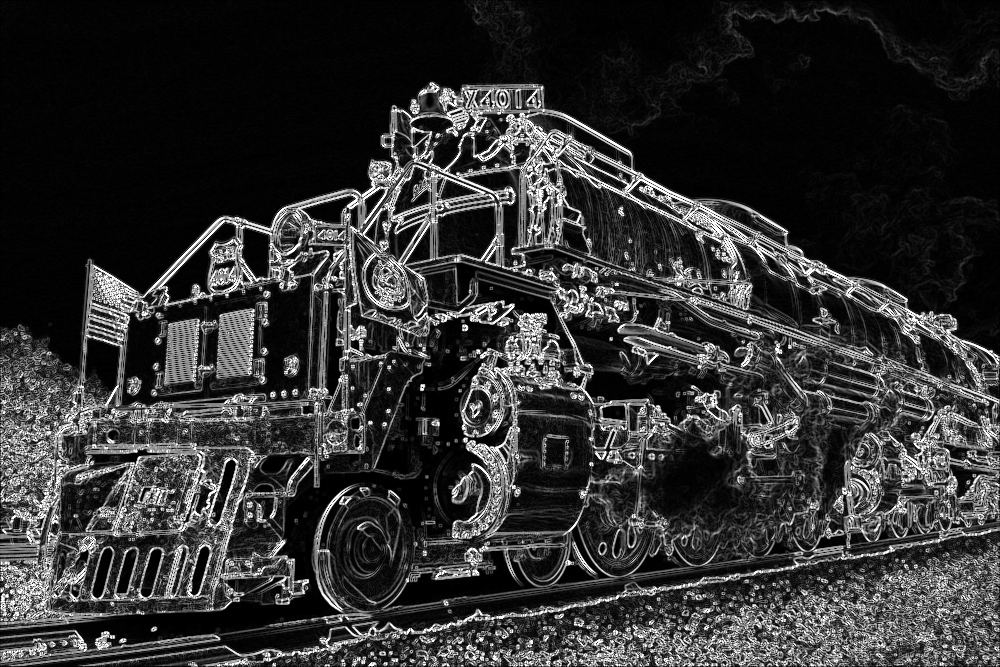

In [8]:
grad_x2 = cv2.Sobel(data, cv2.CV_64F, 1, 0, ksize=3)
grad_y2 = cv2.Sobel(data, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x2 = cv2.convertScaleAbs(grad_x2)
abs_grad_y2 = cv2.convertScaleAbs(grad_y2)

grad2 = cv2.addWeighted(abs_grad_x2, 0.5, abs_grad_y2, 0.5, 0)

image6 = Image.fromarray(grad2)
display(image6)

Here I apply the basic threshold filter to the unblured image. The result has a lot of noise.

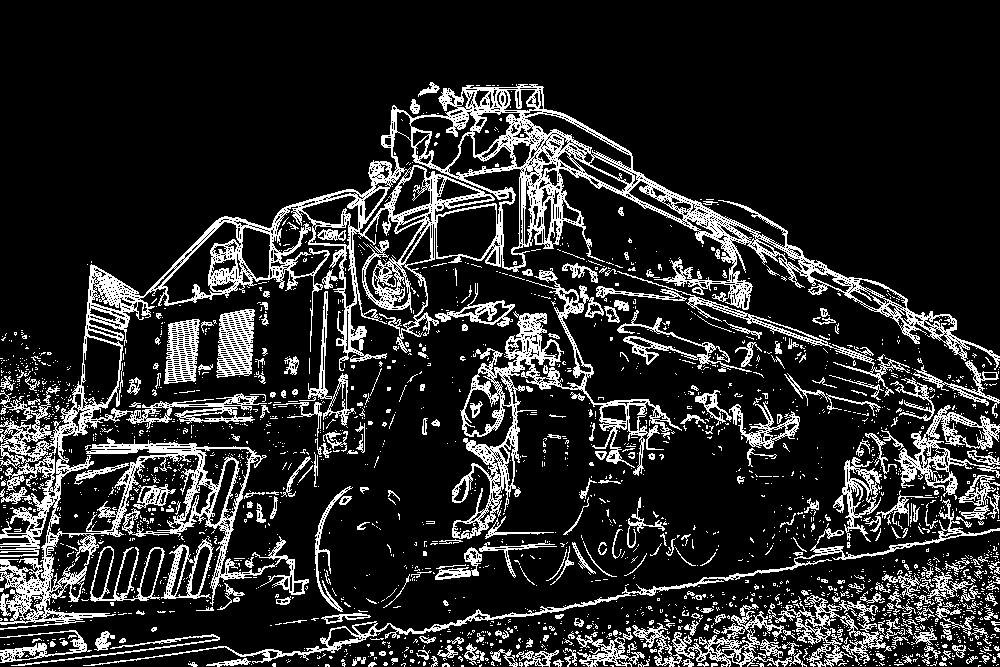

In [9]:
data5 = copy.deepcopy(grad2)
for i in range(data5.shape[0]):
    for j in range(data5.shape[1]):
        if (data5[i][j][0] > 127):
            data5[i][j][0] = 255
            data5[i][j][1] = 255
            data5[i][j][2] = 255
        else:
            data5[i][j][0] = 0
            data5[i][j][1] = 0
            data5[i][j][2] = 0
            
image7 = Image.fromarray(data5)
display(image7)

Here I test to see how OpenCV implements Canny Edge Detection. I was expecting to see more edges.

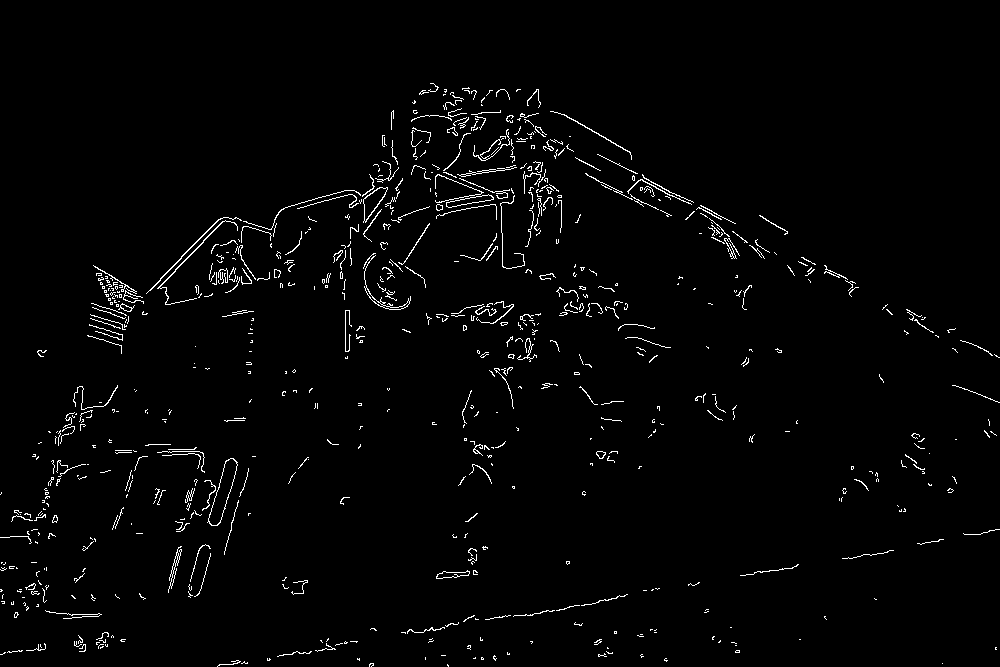

In [10]:
# cv2.IMREAD_COLOR is the mode the image is read in openCV.
# https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
originalImage = cv2.imread('Big-Boy-4014_utah_ss.jpg',1)
cannyED = cv2.Canny(originalImage,data.shape[0],data.shape[1])
image8 = Image.fromarray(cannyED)
display(image8)

## Conclusion

I learned a few things from this project. Applying a Gaussian blur definitely can improve the result of my simplified version of Canny Edge Detection. This is because noise and very insiginficant details in images will have their edges shown unless they are blurred.

I also learned that it may not be the best idea to have one Python library to do your work for you. Even though my version of edge detection was simpler than OpenCV's, my implementation had much more edge detail. In OpenCV's implementation, you can barely determine what you are looking at. In my opinion, my implementation would be much more useful, whether it is for creating a cartoon image filter or using it for computer vision.

With blur:


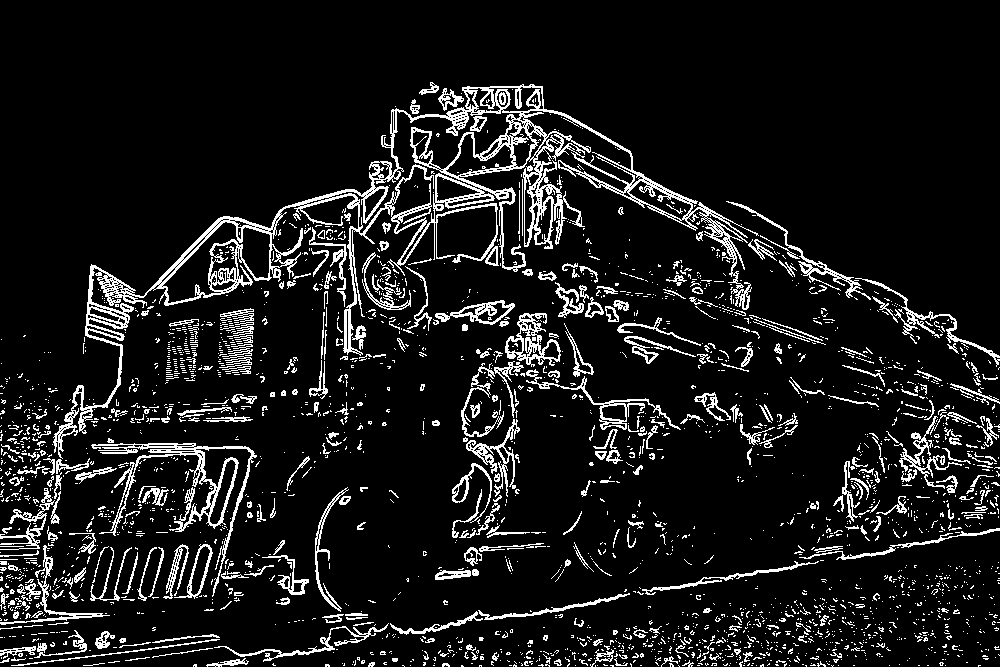

Without blur:


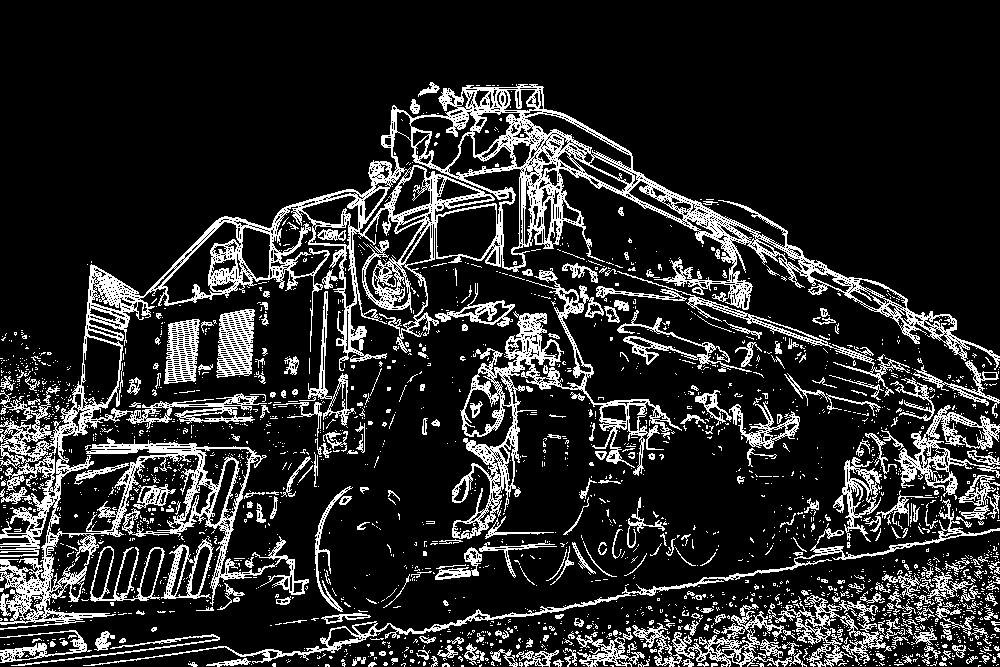

Complete implementation of Canny Edge Detection from OpenCV:


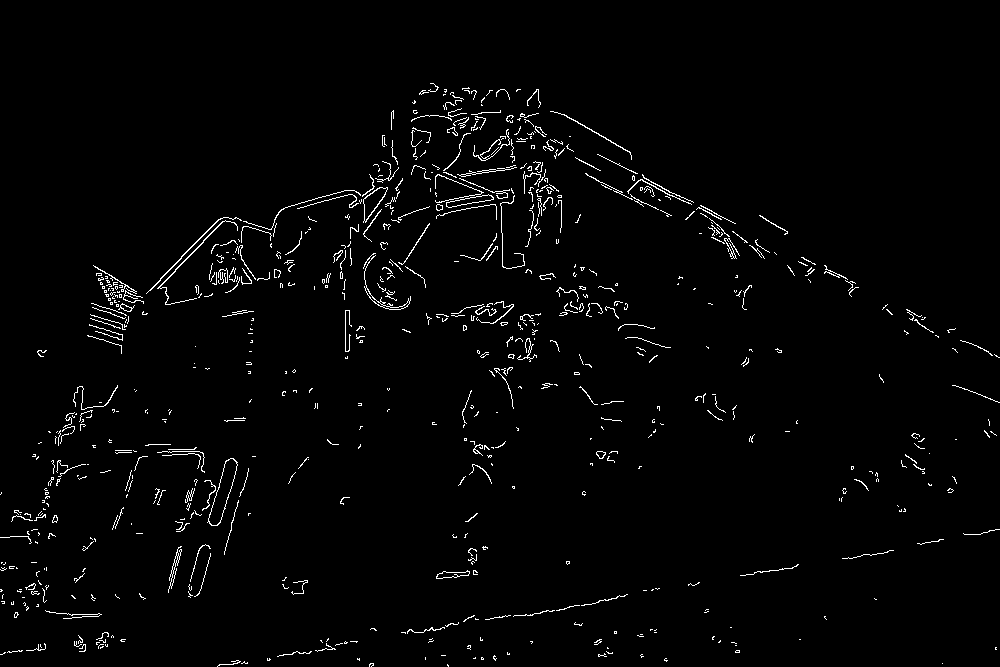

In [11]:
print("With blur:")
display(image5)
print("Without blur:")
display(image7)
print("Complete implementation of Canny Edge Detection from OpenCV:")
display(image8)